   File_Size_KB  Is_Executable  Suspicious_API_Calls  Uses_Packing  \
0         61620              0                    29             1   
1         58569              1                     8             1   
2         49694              1                    39             0   
3         10747              1                    37             0   
4         53464              0                    12             0   

   Downloaded_From_Internet  Has_Encryption  Malware  
0                         1               0        0  
1                         1               0        1  
2                         1               0        1  
3                         1               0        1  
4                         0               0        1  
--Metrics--
Accuracy_score: 0.55425
Precision_score: 0.0
Recall_score: 0.0
F1_score: 0.0


c:\Users\nikha\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


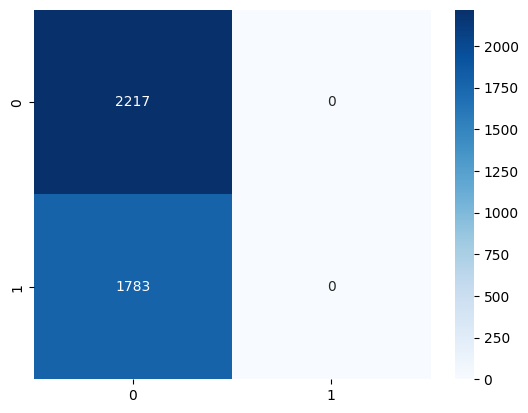

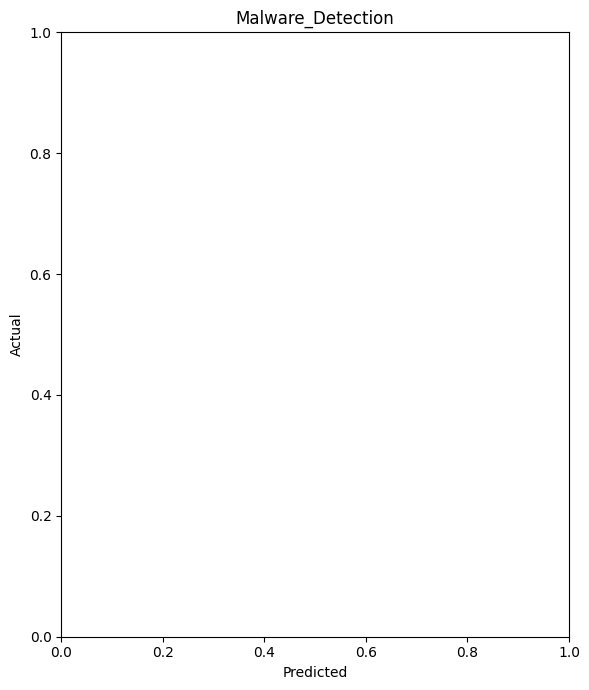

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

df=pd.read_csv("malware_detection_10000.csv")
print(df.head())

x=df[["File_Size_KB","Is_Executable","Suspicious_API_Calls","Uses_Packing","Downloaded_From_Internet","Has_Encryption"]]
y=df["Malware"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("--Metrics--")
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Precision_score:",precision_score(y_test,y_pred))
print("Recall_score:",recall_score(y_test,y_pred))
print("F1_score:",f1_score(y_test,y_pred))

sn.heatmap(cm,annot=True,fmt="d",cmap="Blues")
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,7))
plt.title("Malware_Detection")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

---METRICS---
Accuracy_Score 0.4856666666666667
Recall_Score 0.4835082458770615
F1_Score 0.4553476879632898
Precision_Score 0.43028685790527016


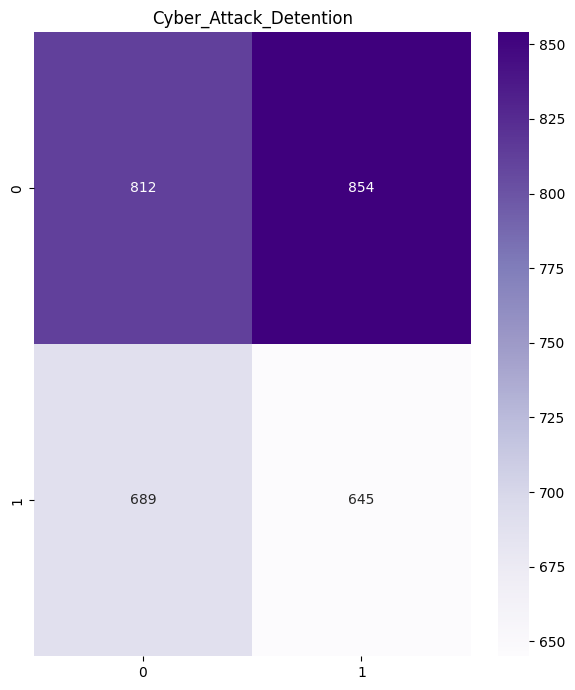

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler

df=pd.read_csv("malware_detection_10000.csv")
#print(df.head())

x=df[["File_Size_KB","Is_Executable","Suspicious_API_Calls","Uses_Packing","Downloaded_From_Internet","Has_Encryption"]]
y=df["Malware"]

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

model=LogisticRegression(max_iter=3000,class_weight="balanced")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("---METRICS---")

print("Accuracy_Score",accuracy_score(y_test,y_pred))
print("Recall_Score",recall_score(y_test,y_pred))
print("F1_Score",f1_score(y_test,y_pred))
print("Precision_Score",precision_score(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,7))
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("malware_prediction")
sns.heatmap(cm,annot=True,fmt="d",cmap="Purples")
plt.tight_layout()
plt.show()